<a href="https://colab.research.google.com/github/syedsauda/CE888/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [0]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
from random import randrange


In [0]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]
print(data)
#test = np.array([])
#test = np.append(test,[1.0])
#print(test)
#sns.lmplot(df.columns[0], df.columns[1], data=df, fit_reg=False) # Scatterplot

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [0]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Create an array of samples of shape (n_iterations, sample_size)
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. In each iteration:
# 3.1 Get the data corresponding to that iteration (new_samples[iteration, :])
# 3.2 Calculate the mean of the iteration data and store it
# (At this point you should have an array of n_iterations values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def boostrap_mean(sample, sample_size, n_iterations):
	# <---INSERT YOUR CODE HERE--->
	
	avgOfRandomSamples = np.array([])
 
	for i in range(n_iterations):
		sample_holder = np.array([])
		for j in range(sample_size):
			sample_holder = np.append(sample_holder,[sample[randrange(sample_size)]])
		avgOfRandomSamples = np.append(avgOfRandomSamples,[np.mean(sample_holder)])

	avgOfRandomSamples = np.sort(avgOfRandomSamples)
	lower = avgOfRandomSamples[0]
	upper = avgOfRandomSamples[n_iterations-1]
	data_mean = np.mean(avgOfRandomSamples)

	return data_mean, lower, upper


Wall time: 0 ns


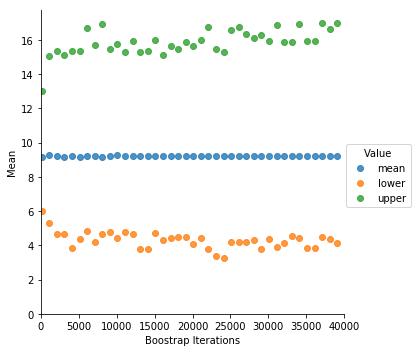

In [0]:
# Call your bootstrap function and plot the results

boots = []

for i in range(100, 40000, 1000):
    boot = boostrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 40000)

#sns_plot.savefig("bootstrap_confidence.png", bbox_inches='tight')
#sns_plot.savefig("bootstrap_confidence.pdf", bbox_inches='tight')



Now, modify the bootstrap function so that you can pass your desired confidence interval as a parameter.



In [0]:
def boostrap_mean_ci(sample, sample_size, iterations, ci):
	# <---INSERT YOUR CODE HERE--->

	avgOfRandomSamples = np.array([])
 
	for i in range(iterations):
		sample_holder = np.array([])
		for j in range(sample_size):
			sample_holder = np.append(sample_holder,[sample[randrange(sample_size)]])
		avgOfRandomSamples = np.append(avgOfRandomSamples,[np.mean(sample_holder)])
	
	clipping = (((100-ci)/100)*iterations)/2
	avgOfRandomSamples = np.sort(avgOfRandomSamples)
	avgOfRandomSamples = avgOfRandomSamples[int(clipping) : -int(clipping)]

	lower = avgOfRandomSamples[0]
	upper = avgOfRandomSamples[avgOfRandomSamples.size-1]
	data_mean = np.mean(avgOfRandomSamples)

	return data_mean, lower, upper

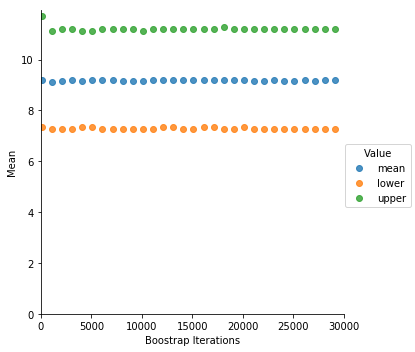

In [0]:

boots = []
for i in range(100, 30000, 1000):
    boot = boostrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 30000)

sns_plot.savefig("bootstrap_confidence_80.png", bbox_inches='tight')
sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset. Load the vehicles.csv file and check the Moodle page for instructions on how to proceed


In [3]:
# Load and visualise the vehicles dataset
# <---INSERT YOUR CODE HERE--->

df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
dataCurrent = df.values.T[0]
dataNew = df.values.T[1]
dataNew = dataNew[~np.isnan(dataNew)] #remove NaN

print(dataCurrent)
print(dataNew)

[18. 15. 18. 16. 17. 15. 14. 14. 14. 15. 15. 14. 15. 14. 22. 18. 21. 21.
 10. 10. 11.  9. 28. 25. 19. 16. 17. 19. 18. 14. 14. 14. 14. 12. 13. 13.
 18. 22. 19. 18. 23. 26. 25. 20. 21. 13. 14. 15. 14. 17. 11. 13. 12. 13.
 15. 13. 13. 14. 22. 28. 13. 14. 13. 14. 15. 12. 13. 13. 14. 13. 12. 13.
 18. 16. 18. 18. 23. 11. 12. 13. 12. 18. 21. 19. 21. 15. 16. 15. 11. 20.
 21. 19. 15. 26. 25. 16. 16. 18. 16. 13. 14. 14. 14. 28. 19. 18. 15. 15.
 16. 15. 16. 14. 17. 16. 15. 18. 21. 20. 13. 23. 20. 23. 18. 19. 25. 26.
 18. 16. 16. 15. 22. 22. 24. 23. 29. 25. 20. 18. 19. 18. 27. 13. 17. 13.
 13. 13. 30. 26. 18. 17. 16. 15. 18. 21. 19. 19. 16. 16. 16. 16. 25. 26.
 31. 34. 36. 20. 19. 20. 19. 21. 20. 25. 21. 19. 21. 21. 19. 18. 19. 18.
 18. 18. 30. 31. 23. 24. 22. 20. 22. 20. 21. 17. 18. 17. 18. 17. 16. 19.
 19. 36. 27. 23. 24. 34. 35. 28. 29. 27. 34. 32. 28. 26. 24. 19. 28. 24.
 27. 27. 26. 24. 30. 39. 35. 34. 30. 22. 27. 20. 18. 28. 27. 34. 31. 29.
 27. 24. 23. 38. 36. 25. 38. 26. 22. 36. 27. 27. 32

In [4]:
# Compare the two fleets.
meanOld = np.mean(dataCurrent)
meanNew = np.mean(dataNew)

print("Old Data Mean:       ",meanOld)

boot = boostrap_mean_ci(dataCurrent, dataCurrent.shape[0], 1000, 95)
print("         BS Mean:    ",boot[0])
print("         Lower Bound:",boot[1])
print("         Upper Bound:",boot[2])

print("\nNew Data Mean:       ",meanNew)

boot = boostrap_mean_ci(dataNew, dataNew.shape[0], 1000, 95)
print("         BS Mean:    ",boot[0])
print("         Lower Bound:",boot[1])
print("         Upper Bound:",boot[2])

tObs = meanNew-meanOld
print("\nTobs:", tObs)

# You can create a permutation test function to do this. Check the lecture notes!

concat = np.concatenate((np.random.choice(dataCurrent,len(dataNew)),dataNew))
counter = 0
numPermutations = 20000
for i in range(numPermutations):
    perm = np.random.permutation(concat)
    pold = perm[:int(len(perm)/2)]
    pnew = perm[int(len(perm)/2):]
    
    tPerm = np.mean(pnew) - np.mean(pold)
    if tPerm>tObs:
        counter +=1
        print("a")
pVal = counter / numPermutations
print("pVal:",pVal)

Old Data Mean:        20.14457831325301
         BS Mean:     20.16265905728176
         Lower Bound: 19.401606425702813
         Upper Bound: 20.95983935742972

New Data Mean:        30.481012658227847
         BS Mean:     30.453884077281813
         Lower Bound: 29.075949367088608
         Upper Bound: 31.810126582278482

Tobs: 10.336434344974837
pVal: 0.0


We will never get a higher tPerm value than Tobs so we can conclude that the new data is better.